In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import requests
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba.analyse as analyse

In [184]:
url = 'https://www.ptt.cc/bbs/Conan/search?q=%E6%9F%AF%E5%8D%97'
i = 0
data = pd.DataFrame({'title':[],'comment':[]})
for i in range(5) :
    try :
        print(i)
        r = requests.get(url)
        soup = BeautifulSoup(r.text,'html.parser')
        sel = soup.select('div.title a')
        for i in sel :
            title.append(i.text)
            html = f"https://www.ptt.cc{i['href']}"
            R = requests.get(html)
            Soup = BeautifulSoup(R.text,'html.parser')
            Sel = Soup.select('div.push span')
            for j in range(2,len(Sel),4) :
                context = [{'title':i.text,"comment":Sel[j].text[1:],
                            "time":Sel[j+1].text[:-1],'website':html}]
                data = data.append(context)
        url = f"https://www.ptt.cc/bbs/Conan/search?page={i}&q=%E6%9F%AF%E5%8D%97"
    except :
        print('end')
        break
        
data.to_csv('爬蟲資料.csv')

0
1
2
3
4
5
6
7


In [185]:
data

,title,comment,time,website
0,[買賣] 收 柯南劇場版漫畫 + 97單行本,隔壁海鮮拍賣有看到全新的97,01/02 11:57,https://www.ptt.cc/bbs/Conan/M.1672586544.A.A8...
0,Re: [情報] 柯南 M26劇場版 黑鐵的魚影 預告,等等 那個時候灰原(宮野志保?) 旁邊是有組織的人嗎?,12/27 13:58,https://www.ptt.cc/bbs/Conan/M.1672119852.A.48...
0,Re: [情報] 柯南 M26劇場版 黑鐵的魚影 預告,通常他不是都說 工藤君?,12/27 13:58,https://www.ptt.cc/bbs/Conan/M.1672119852.A.48...
0,Re: [情報] 柯南 M26劇場版 黑鐵的魚影 預告,之前特報是喊工藤君 這次變講江戶川 而且還是全名,12/27 14:28,https://www.ptt.cc/bbs/Conan/M.1672119852.A.48...
0,Re: [情報] 柯南 M26劇場版 黑鐵的魚影 預告,不知道有什麼用意XD,12/27 14:28,https://www.ptt.cc/bbs/Conan/M.1672119852.A.48...
...,...,...,...,...
0,[討論] 日本柯南迷的柯南房,感謝分享！也好想知道大家是怎麼放週邊的XD,05/16 14:55,https://www.ptt.cc/bbs/Conan/M.1652681614.A.5D...
0,[討論] 日本柯南迷的柯南房,看標題我還以為是建了一間一模一樣的工藤家XD,05/16 16:49,https://www.ptt.cc/bbs/Conan/M.1652681614.A.5D...
0,[討論] 日本柯南迷的柯南房,我的周邊都亂塞...,05/16 16:49,https://www.ptt.cc/bbs/Conan/M.1652681614.A.5D...
0,[討論] 日本柯南迷的柯南房,佈置很用心耶,05/16 22:25,https://www.ptt.cc/bbs/Conan/M.1652681614.A.5D...


In [3]:
data = pd.read_csv("C:/Users/asd11/爬蟲資料.csv")

In [4]:
data.head()

,Unnamed: 0,title,comment,time,website
0,0,[買賣] 收 柯南劇場版漫畫 + 97單行本,隔壁海鮮拍賣有看到全新的97,01/02 11:57,https://www.ptt.cc/bbs/Conan/M.1672586544.A.A8...
1,0,Re: [情報] 柯南 M26劇場版 黑鐵的魚影 預告,等等 那個時候灰原(宮野志保?) 旁邊是有組織的人嗎?,12/27 13:58,https://www.ptt.cc/bbs/Conan/M.1672119852.A.48...
2,0,Re: [情報] 柯南 M26劇場版 黑鐵的魚影 預告,通常他不是都說 工藤君?,12/27 13:58,https://www.ptt.cc/bbs/Conan/M.1672119852.A.48...
3,0,Re: [情報] 柯南 M26劇場版 黑鐵的魚影 預告,之前特報是喊工藤君 這次變講江戶川 而且還是全名,12/27 14:28,https://www.ptt.cc/bbs/Conan/M.1672119852.A.48...
4,0,Re: [情報] 柯南 M26劇場版 黑鐵的魚影 預告,不知道有什麼用意XD,12/27 14:28,https://www.ptt.cc/bbs/Conan/M.1672119852.A.48...


In [3]:
jieba.set_dictionary('dict.txt.big')

In [4]:
data = pd.read_csv("C:/Users/asd11/爬蟲資料.csv")

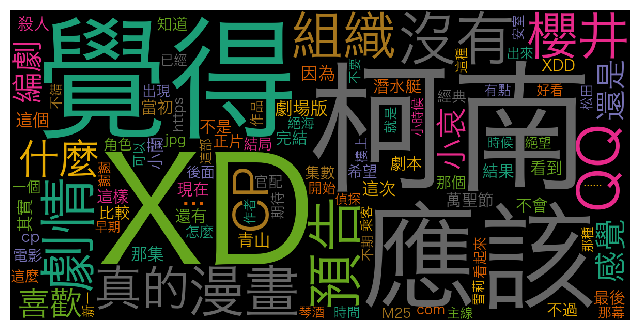

In [13]:

content_list = " ".join(data['comment'])
tfidf_fre = jieba.analyse.extract_tags(content_list, topK=100, withWeight=True, allowPOS=(),withFlag=True)
    
count_dic = {}
for i in range(len(tfidf_fre)):
    count_dic[tfidf_fre[i][0]] = tfidf_fre[i][1]
myWordClode = WordCloud(width=1200, 
                       height=600,     
                       background_color="black", 
                       colormap="Dark2",
                       font_path = 'Hiragino Sans GB.ttc'
                        ).fit_words(count_dic)
plt.figure(figsize=(8, 6), dpi=100) 
plt.imshow(myWordClode)
plt.axis("off")
plt.savefig('柯南文字雲.jpg')
plt.show()